In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Import Necessary Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
from sklearn.preprocessing import StandardScaler

In [3]:
dir = '/content/gdrive/My Drive/Dataset Titanic'

# **Loading and Exploring the dataset**

In [4]:
df = pd.read_csv(dir + '/Titanic-Dataset.csv')

In [5]:
print(df.shape)

(891, 12)


In [6]:
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
print(df.isnull().sum())   # Counting the missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# **Handling Missing Values**

In [10]:
df.fillna({'Age': df['Age'].median()}, inplace=True)

In [11]:
df.fillna({'Embarked': df['Embarked'].mode()[0]}, inplace=True)

In [12]:
df.fillna({'Fare' : df['Fare'].median()}, inplace=True)

In [13]:
df.drop(columns='Cabin', inplace=True)

# **Feature Engineering and Encoding**

In [14]:
df['Title'] = df['Name'].str.extract(r'([A-Za-z]+)\.', expand=False)

common_titles = ['Mr', 'Miss', 'Mrs', 'Master']

df['Title'] = df['Title'].apply(lambda t: t if t in common_titles else 'Other')

In [15]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [16]:
df.drop(columns=['PassengerId','Name','Ticket'], inplace=True)

In [17]:
df = pd.get_dummies(df, columns=['Sex','Embarked','Title'], drop_first=True)

# **Standardizing**

In [18]:
num_cols = ['Age','Fare','FamilySize']

In [21]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# **Detecting amd removing the Extreme Outliers**

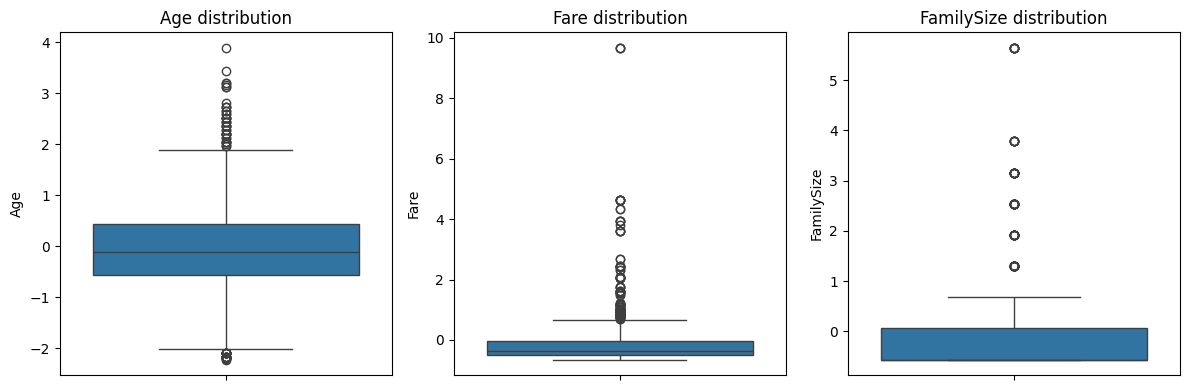

In [22]:
fig, axes = plt.subplots(1, len(num_cols), figsize=(12,4))
for ax, col in zip(axes, num_cols):
    sns.boxplot(y=df[col], ax=ax)
    ax.set_title(f'{col} distribution')
plt.tight_layout()
plt.show()

In [25]:
for col in num_cols:         # Removing Outliers Beyond 3 standard Deviation
    df = df[np.abs(df[col]) <= 3]

# **Feature Correlation Analysis**

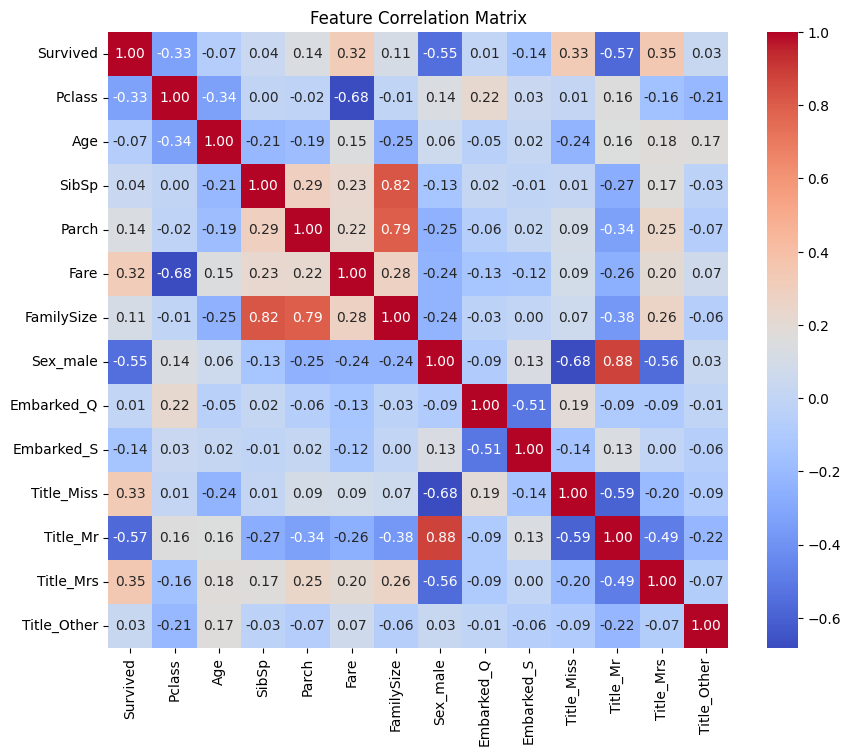

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# **Final Shape and Info**

In [27]:
print("Cleaned dataset shape:", df.shape)
display(df.head())

Cleaned dataset shape: (839, 14)


,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,3,-0.565736,1,0,-0.502445,0.059160,True,False,True,False,True,False,False
1,1,1,0.663861,1,0,0.786845,0.059160,False,False,False,False,False,True,False
2,1,3,-0.258337,0,0,-0.488854,-0.560975,False,False,True,True,False,False,False
3,1,1,0.433312,1,0,0.420730,0.059160,False,False,True,False,False,True,False
4,0,3,0.433312,0,0,-0.486337,-0.560975,True,False,True,False,True,False,False
